In [1]:
#https://datahexa.com/kmeans-clustering-with-wine-dataset/参考

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [3]:
wine = datasets.load_wine()

In [4]:
X = wine.data

In [5]:
X.shape

(178, 13)

In [6]:
y=wine.target

In [7]:
y.shape

(178,)

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
model = KMeans(n_clusters=3)

In [10]:
labels = model.fit_predict(X)

In [11]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [12]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [13]:
df['species'] = [species_label(theta) for theta in wine.target]

In [14]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,46,1,0
1,0,50,19
2,13,20,29


In [15]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

In [21]:
def plt_result(X_train, centers, xx, contflag):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    if(contflag):
        pred = np.empty(len(xx), dtype=int)
        for i, x in enumerate(xx):
            d = distance(x, centers)
            pred[i] = np.argmin(d)
        plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [17]:
print("labels: {}".format(model.labels_))
print("cluster_centers: {}".format(model.cluster_centers_))
model.cluster_centers_

labels: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
cluster_centers: [[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

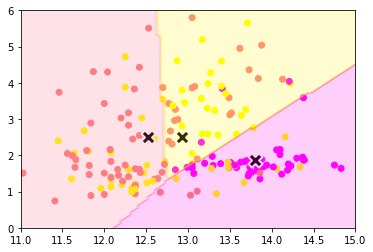

In [22]:
xx0, xx1 = np.meshgrid(np.linspace(11, 15, 100), np.linspace(0, 6, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
plt_result(X, model.cluster_centers_[:,:2], xx, True)

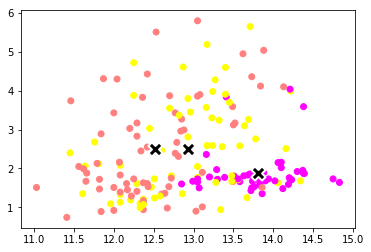

In [23]:
plt_result(X, model.cluster_centers_[:,:2], xx, False)